### simple linear regression

In [1]:
import pandas as pd

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Estimate profit based on RND budget

### Perform scatterplot on PROFIT vs RND

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

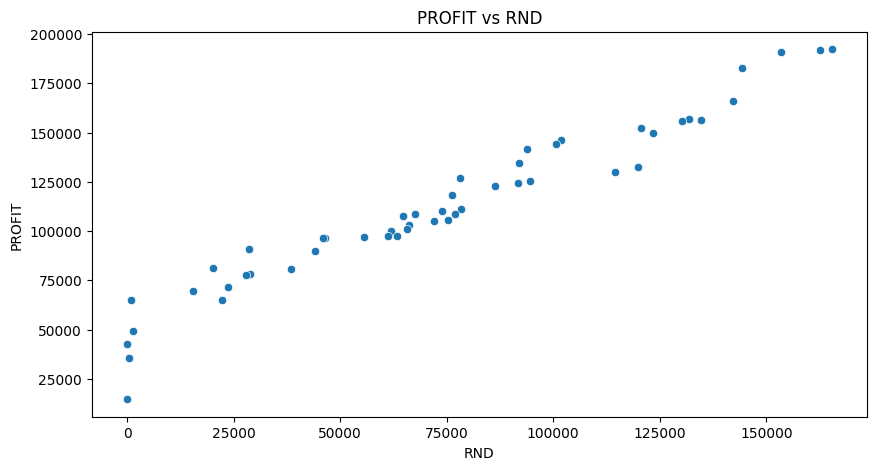

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="RND",y="PROFIT")
plt.title("PROFIT vs RND")
plt.show()

### Seperate X (RND) and Y (PROFIT)

In [8]:
X = df[["RND"]]
Y = df[["PROFIT"]]

In [10]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [11]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [12]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

### Create a linear regression model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### Get the slope and intercept

In [15]:
slope = model.coef_
intercept = model.intercept_
print(f"Slope : {slope}, Intercept : {intercept}")

Slope : [[0.85429137]], Intercept : [49032.89914125]


### PROFIT(est) = 49032.9 + 0.8543*RND

##### Out of sample prediction

###### estimate the profit for starup with RND spend of 100000

In [16]:
rnd = 1_60_000
profit_pred = model.predict([[rnd]])
print(f"Predicted profit : {profit_pred}")

Predicted profit : [[185719.51849146]]


### Plot regression plot

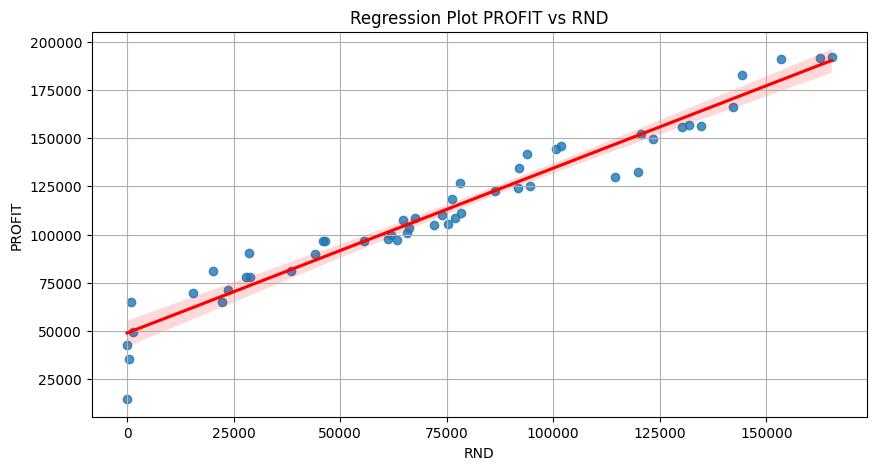

In [17]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color":"red"})
plt.title("Regression Plot PROFIT vs RND")
plt.grid()
plt.show()

### Model Evaluation

1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R2 Score

##### Predict values for X data

In [18]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [19]:

Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
print(f"Mean Squared Error : {mse:.2f}")

Mean Squared Error : 85120931.33


In [21]:
rmse = mse**(1/2)
print(f"Root Mean Squared Error : {rmse:.2f}")

Root Mean Squared Error : 9226.10


In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
print(f"Mean Absolute Error : {mae:.2f}")

Mean Absolute Error : 6910.98


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
print(f"Mean Absolute Percentage Error : {mape:.4f}")

Mean Absolute Percentage Error : 0.1107


In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
print(f"R2 Score : {r2:.4f}")

R2 Score : 0.9465


### R2 Score > 0.80 is considered to be good

### Performing Out of Sample predictions

In [25]:
rnd = 80_000
profit_est = model.predict([[rnd]])
print(f"For given RND budget : {rnd:.2f} , Estimated Profit is : {profit_est}")

For given RND budget : 80000.00 , Estimated Profit is : [[117376.20881636]]
